# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

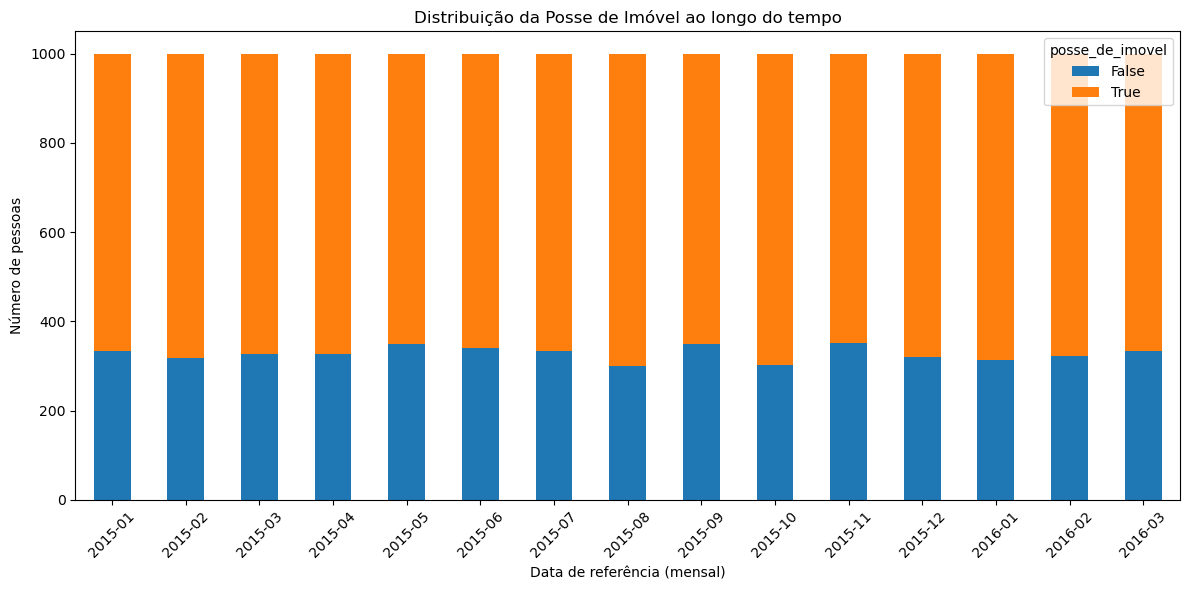

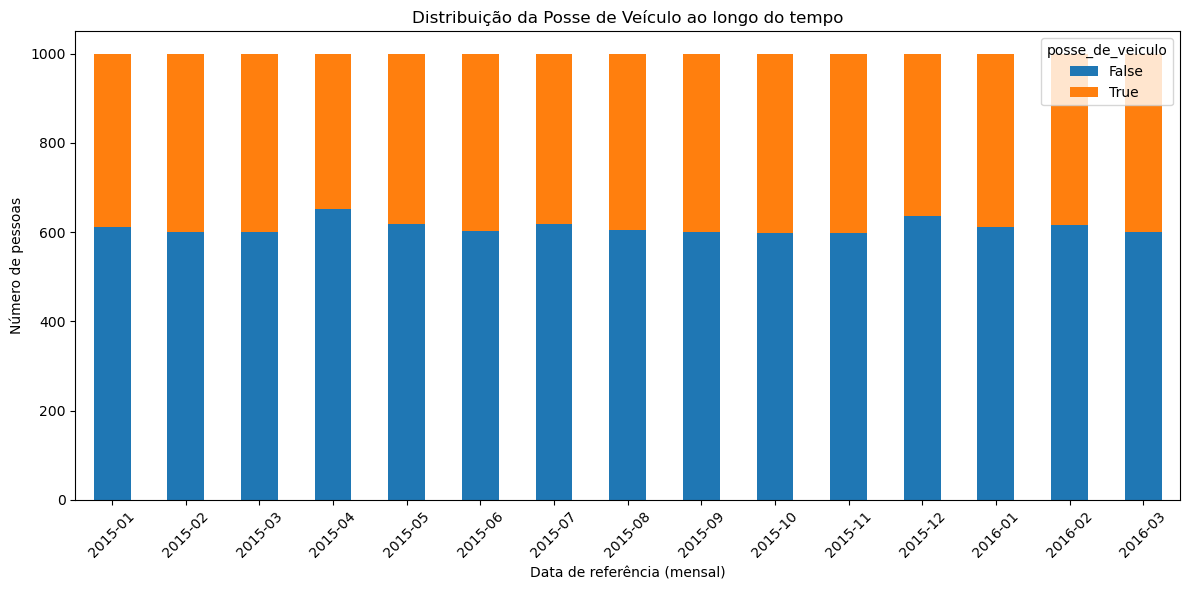

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base
df = pd.read_csv('previsao_de_renda.csv')

# Garantir que a data está em formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Agrupar por mês e contar ocorrências de posse de imóvel
imovel_tempo = df.groupby([df['data_ref'].dt.to_period('M'), 'posse_de_imovel']).size().unstack()

# Agrupar por mês e contar ocorrências de posse de veículo
veiculo_tempo = df.groupby([df['data_ref'].dt.to_period('M'), 'posse_de_veiculo']).size().unstack()

# Plotar gráfico de barras - posse de imóvel
imovel_tempo.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribuição da Posse de Imóvel ao longo do tempo')
plt.ylabel('Número de pessoas')
plt.xlabel('Data de referência (mensal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotar gráfico de barras - posse de veículo
veiculo_tempo.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribuição da Posse de Veículo ao longo do tempo')
plt.ylabel('Número de pessoas')
plt.xlabel('Data de referência (mensal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
Sim, há pequenas variações ao longo do tempo, mas nada muito abrupto.
A posse de imóvel e veículo parecem razoavelmente estáveis, mas vale observar se algum pico ou queda coincide com eventos econômicos ou políticas de crédito em algum período.

SyntaxError: invalid syntax (2404220493.py, line 1)

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

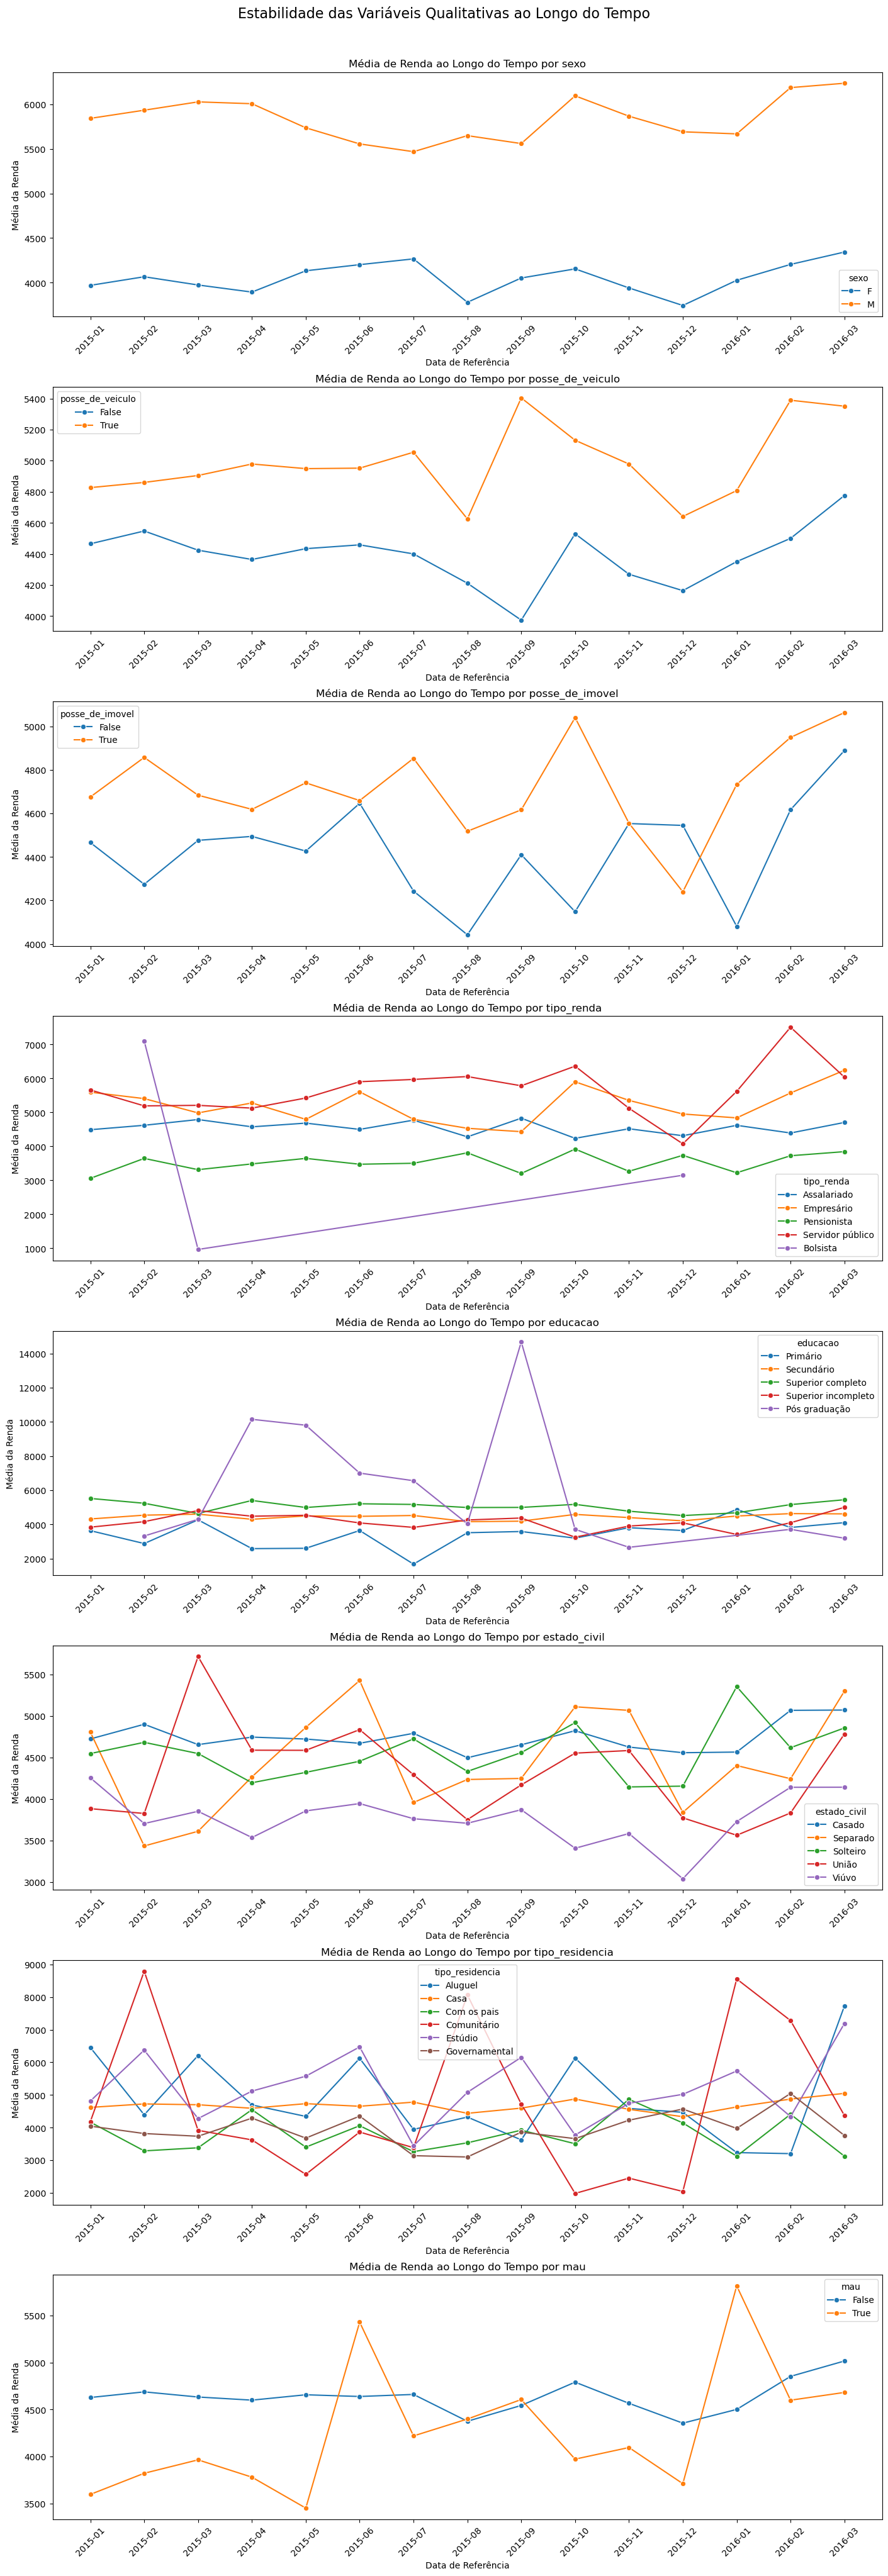

In [2]:
# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Identificar variáveis qualitativas
qualitative_vars = df.select_dtypes(include=['object', 'bool']).columns.tolist()
qualitative_vars = [var for var in qualitative_vars if var not in ['index', 'data_ref']]

# Plotar médias de renda ao longo do tempo para cada nível de cada variável qualitativa
fig, axes = plt.subplots(len(qualitative_vars), 1, figsize=(14, 5 * len(qualitative_vars)), constrained_layout=True)

for ax, var in zip(axes, qualitative_vars):
    avg_income_by_time = df.groupby([df['data_ref'].dt.to_period('M').astype(str), var])['renda'].mean().reset_index()
    sns.lineplot(data=avg_income_by_time, x='data_ref', y='renda', hue=var, marker='o', ax=ax)
    ax.set_title(f'Média de Renda ao Longo do Tempo por {var}')
    ax.set_ylabel('Média da Renda')
    ax.set_xlabel('Data de Referência')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Estabilidade das Variáveis Qualitativas ao Longo do Tempo', fontsize=16, y=1.02)
plt.show()

In [ ]:
As variáveis qualitativas como posse de imóvel, posse de veículo, tipo de residência, sexo, estado civil, tipo de renda, e educação mantêm padrões consistentes de renda média ao longo dos meses. Isso sugere que elas podem sim ser boas candidatas para uso em uma modelagem preditiva